<a href="https://colab.research.google.com/github/sanjay1618/pandas_numpy_matplot/blob/main/pandas3_basics_of_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
anscombe=sns.load_dataset("anscombe")
print(anscombe.head(n=6))


  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
5       I  14.0  9.96


In [ ]:
#subsetting only quartet 1 values or rows
set1_condition=anscombe['dataset']=='I';
set1=anscombe.loc[set1_condition];
print(set1)



   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68


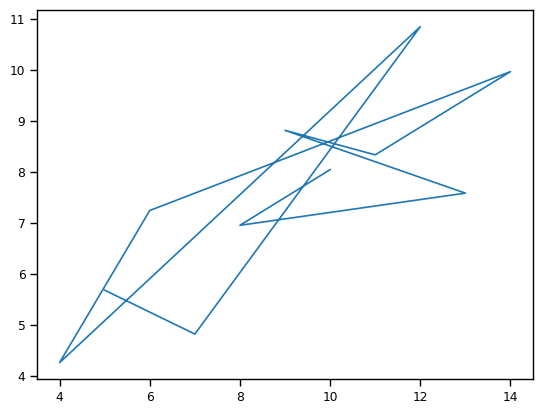

In [ ]:
plt.plot(set1['x'],set1['y']);
plt.show()


In [ ]:
#Subsetting all quarters using loc method..
set2=anscombe.loc[anscombe['dataset']=='II'];
set3=anscombe.loc[anscombe['dataset']=='III'];
set4=anscombe.loc[anscombe['dataset']=='IV'];

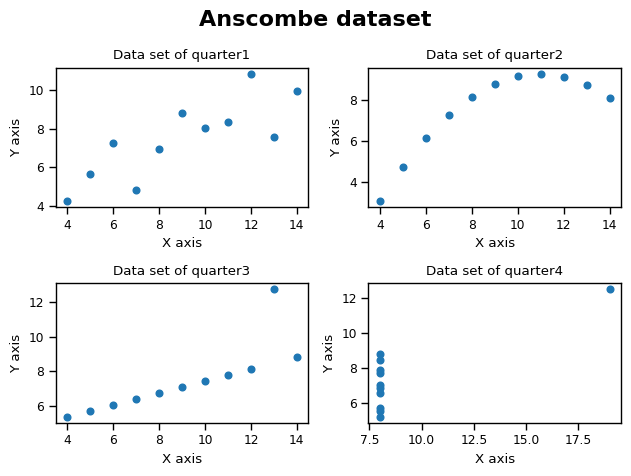

In [ ]:
# Subplotting all the quarters in a single figure.
#Before we can subplot them, we need to create a figure container(Think it as container for holding all subplots)
fig=plt.figure()
axes1=fig.add_subplot(2,2,1)  #creating a subplot in the 2*2 grid and placing it at top-left and storing it in axes1;
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

# Now plotting values into each of the subplot.
axes1.plot(set1['x'],set1['y'],'o')
axes2.plot(set2['x'],set2['y'],'o')
axes3.plot(set3['x'],set3['y'],'o')
axes4.plot(set4['x'],set4['y'],'o')

#adding titles to each subplot using set_title() method
axes1.set_title("Data set of quarter1")
axes2.set_title("Data set of quarter2")
axes3.set_title("Data set of quarter3")
axes4.set_title("Data set of quarter4")

#Setting X and Y axes to the subplots using the set_xlabel or set_ylabel functions
axes1.set_xlabel("X axis");
axes1.set_ylabel("Y axis");
axes2.set_xlabel("X axis");
axes2.set_ylabel("Y axis");
axes3.set_xlabel("X axis");
axes3.set_ylabel("Y axis");
axes4.set_xlabel("X axis");
axes4.set_ylabel("Y axis");



#Adding a title for the entire figure using suptitle()

fig.suptitle("Anscombe dataset", fontsize=16,fontweight="bold",ha="center")

#To minimize the extra white space between plots and avoid overlapping we can use the
#set_tight_layout mode .
fig.set_tight_layout(True)
plt.show();



Before we get into learning or developing some interesting figures, let us understand the anatomy of a figure

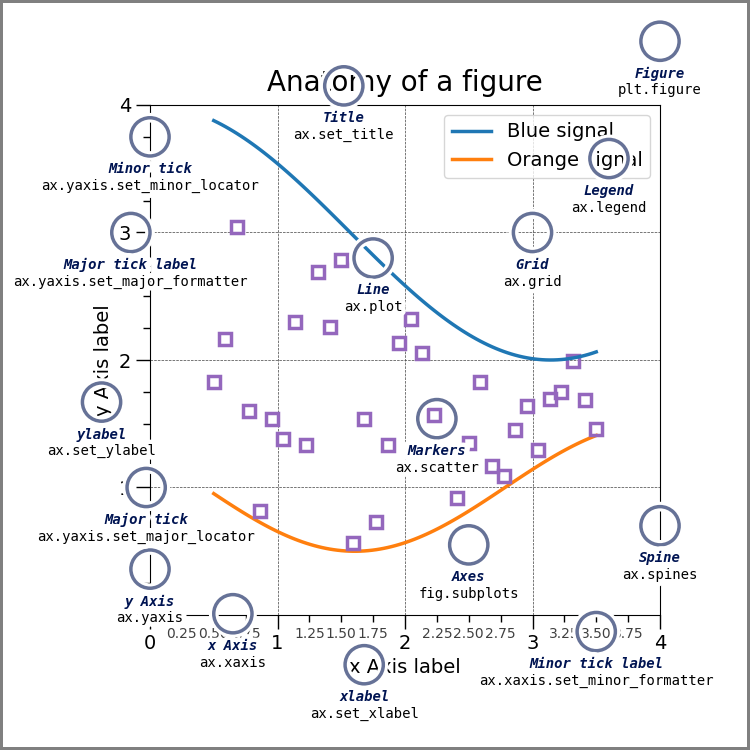

#TIPS DATA

The tips data we will be using for the next series of visualizations come from the seaborn library. This data set contains the amount of the tips that people leave for various variables. For example, the total cost of the bill, the size of the party, the day of the week, and the time of day.We can load this data set just as we did the Anscombe data set.

In [ ]:
tips=sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(0, 0.5, 'Count')

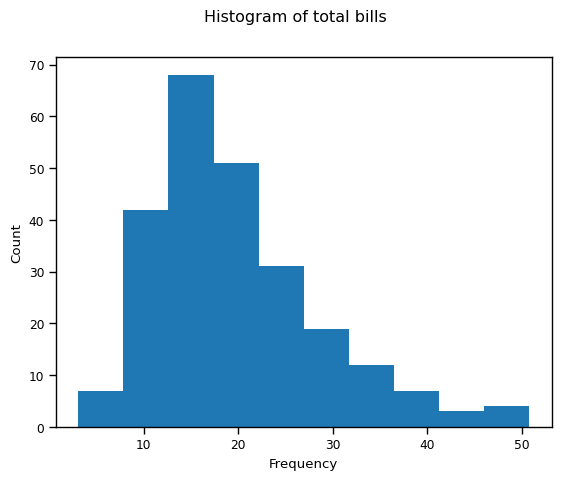

In [ ]:
# Creating a figure container for one subplot within it.( Think of it as only indivizual plot)
fig2=plt.figure()
axes1=fig2.add_subplot(1,1,1)
#bins are equally spaced ranges within your data. It is automatically done by matplotlib for us.
axes1.hist(data=tips,x='total_bill',bins=10)
fig2.suptitle("Histogram of total bills")
axes1.set_xlabel("Frequency")
axes1.set_ylabel("Count")

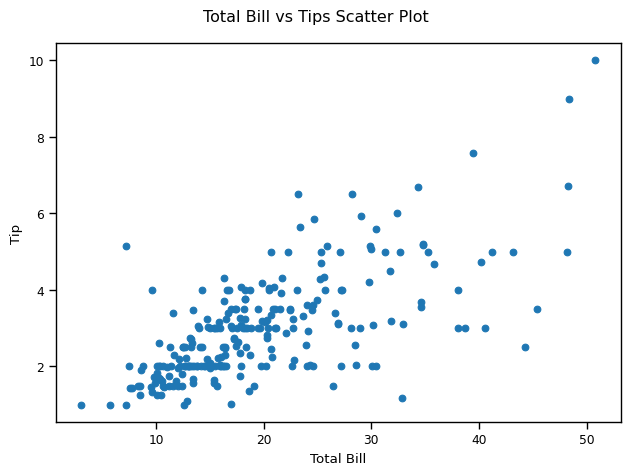

In [ ]:
# Creating  a scatterplot. Most cases scatterplots are used for bivarite continuous varibles.
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(data=tips, x='total_bill',y='tip')
# adding labels to the scatterplot to make it more informative
scatter_plot.suptitle("Total Bill vs Tips Scatter Plot")
axes1.set_xlabel("Total Bill")
axes1.set_ylabel("Tip")
scatter_plot.set_tight_layout(True)

#Showing the scatterplot using plt.show();

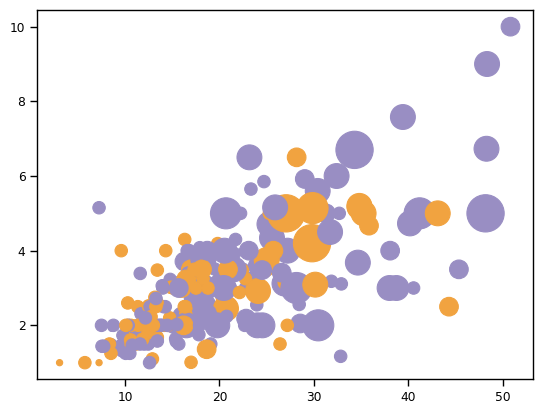

In [ ]:
#Multivariate plotting.
# We could do that by using different colors for different classes of the third variable. and size for the fourth variable.
#Assigning color values to the class lables of the third variable

colors={
    "Female":"#f1a340", #orange
    "Male":"#998ec3"    #purple
};
scatter_plot_2=plt.figure()
axes1=scatter_plot_2.add_subplot(1,1,1)
# s option is the size of the data points where as c option is the color of the data point.
# so here sizes are squared and then multiplied with 10 to emphasize the difference
#
axes1.scatter(data=tips,x='total_bill',y='tip',
              s=tips['size']**2*20,
              c=tips['sex'].map(colors))

In [ ]:
import seaborn as sns
tips_1=sns.load_dataset("tips")
sns.set_context("paper")


Text(0.5, 1.0, 'Total Bill Histogram')

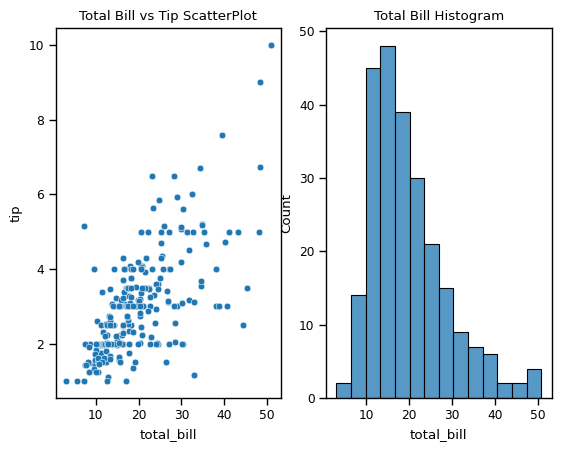

In [ ]:
# Histogram using seaborn module.
#Rather than creating a figure and then subplots in multiple lines of code, we could use sns.subplots() function to return both figure object and subplots
sns_scatter,axes=plt.subplots(1,2)
#now the 4 subplots are stored in the axes array.
sns.scatterplot(data=tips_1,x='total_bill',y='tip',ax=axes[0]);
sns.histplot(data=tips_1,x='total_bill',ax=axes[1])

#using matplotlib notation to set a title.
axes[0].set_title('Total Bill vs Tip ScatterPlot')
axes[1].set_title('Total Bill Histogram')


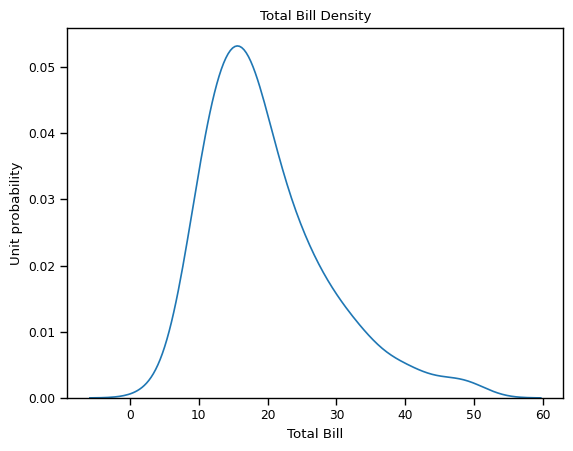

In [ ]:
#Kernel Density Estimation Curve using the kdeplot.
density,ax= plt.subplots()
sns.kdeplot(data=tips,x='total_bill',ax=ax)

ax.set_title("Total Bill Density")
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit probability')

plt.show()